# Proyecto Final
by Matías Moré

In [1]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_palette(["#024059", "#66D9CD", "#D9923B", "#BF726B", "#401F1F"])



## Dataset Fumadores

Este conjunto de datos consiste en datos biologicos de distintos individuos, recolectados con el objetivo de analizar los efectos y las señales del habito tabaquico. A travez de distintas caracteristicas de estudios de laboratorio como el estado sanguineo, urinario, hepatico, higienico y su relacion con el tabaquismo, se buscara encontrar patrones que determinen biologicamente los parametros a tener en cuenta para identificar a individuos fumadores. Teniendo en cuenta estos datos se realizara una comparacion de estas variables a fin de determinar su utilidad y trascendencia para lograr este fin.

Origen del dataset: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?resource=download

### Definición de objetivo

En este trabajo se intenta desarrollar, a partir de los datos proporcionados, un modelo que permita predecir de la forma mas eficiente los individuos que sean fumadores.

### Contexto comercial

Se intenta elaborar una predicción a patir de las historias clínicas, para informar a los profesionales sobre si deben considerar la posibilidad de que sus pacientes sean fumadores y tomarlo en cuenta a la hora de elaborar tratamientos o indicar medicamentos.

### Problema comercial

¿Es posible, con los datos de los pacientes en nuestra base de datos de historia clinica, encontrar patrones que identifiquen hábitos tabáquicos? ¿En qué grupos de pacientes  debemos incursionar más para la prevención de tabaquismo?

### Contexto analítico

Se toman 55692 pacientes de la base de datos de historia clinica, a quienes se les identifican los estudios básicos completos y quienes cuentan con la verificacion profesional de si son fumadores o no. Estos datos se pretenden usar para encausar un modelo predictivo de aprendizaje supervisado que nos permita identificar los futuros casos de pacientes a quienes no se les determinó aún si son fumadores o no. 

### Code Acquisition

In [2]:
smoke_data = pd.read_csv("/workspaces/CoderPosta/Data/smoking.csv")
smoke_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [3]:
df = smoke_data.copy()
df["height(M)"] = df["height(cm)"] / 100
df["IMC"] = df["weight(kg)"] / (df["height(M)"] ** 2)
df_raw = smoke_data.copy()
df_raw["height(M)"] = df["height(cm)"] / 100
df_raw["IMC"] = df["weight(kg)"] / (df["height(M)"] ** 2)

# Limpieza de Datos

### Nulos y Duplicados

Se verifica que no hay duplicados ni nulos.

In [4]:
print(df.isna().sum().sort_values())
print('Cant. de Duplicados ' ,df.duplicated().sum())

ID                     0
smoking                0
tartar                 0
dental caries          0
oral                   0
Gtp                    0
ALT                    0
AST                    0
serum creatinine       0
Urine protein          0
hemoglobin             0
LDL                    0
HDL                    0
height(M)              0
triglyceride           0
fasting blood sugar    0
relaxation             0
systolic               0
hearing(right)         0
hearing(left)          0
eyesight(right)        0
eyesight(left)         0
waist(cm)              0
weight(kg)             0
height(cm)             0
age                    0
gender                 0
Cholesterol            0
IMC                    0
dtype: int64
Cant. de Duplicados  0


Debido a que la columna "oral" no aporta datos significativos se elimina la variable por su irrelevancia para el modelo.

In [5]:
df.drop(labels="oral", axis=1, inplace=True)
df.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,height(M),IMC
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,0,Y,0,1.55,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,0,Y,0,1.60,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,0,N,1,1.70,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,0,Y,0,1.65,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,0,N,0,1.55,24.973985


In [6]:
df_raw.drop(labels="oral", axis=1, inplace=True)
df_raw.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,height(M),IMC
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,0,Y,0,1.55,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,0,Y,0,1.60,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,0,N,1,1.70,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,0,Y,0,1.65,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,0,N,0,1.55,24.973985


In [7]:
categoric_col = []
for col in df.columns:
	if (df[col].nunique()<10) and (df[col].dtype=="object"):
		categoric_col.append(col) 
  
print("Categoric Col {}".format(categoric_col))
Numeric=list(set(df.columns)- set(categoric_col))
print("Cont Col {}".format(Numeric))

Categoric Col ['gender', 'tartar']
Cont Col ['ALT', 'AST', 'eyesight(left)', 'smoking', 'ID', 'hearing(right)', 'HDL', 'Cholesterol', 'waist(cm)', 'IMC', 'systolic', 'age', 'Urine protein', 'fasting blood sugar', 'Gtp', 'height(M)', 'serum creatinine', 'height(cm)', 'triglyceride', 'weight(kg)', 'eyesight(right)', 'hearing(left)', 'dental caries', 'LDL', 'relaxation', 'hemoglobin']


Se delimitan los limites superior e inferior de cada boxplot

In [8]:
dict = {}
for col in Numeric:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict["upper_limit"+ "_" + col] = upper_limit
    dict["lower_limit"+ "_" + col] = lower_limit 

In [9]:
dict

{'upper_limit_ALT': 55.0,
 'lower_limit_ALT': -9.0,
 'upper_limit_AST': 41.5,
 'lower_limit_AST': 5.5,
 'upper_limit_eyesight(left)': 1.7999999999999998,
 'lower_limit_eyesight(left)': 0.20000000000000018,
 'upper_limit_smoking': 2.5,
 'lower_limit_smoking': -1.5,
 'upper_limit_ID': 83536.5,
 'lower_limit_ID': -27845.5,
 'upper_limit_hearing(right)': 1.0,
 'lower_limit_hearing(right)': 1.0,
 'upper_limit_HDL': 94.5,
 'lower_limit_HDL': 18.5,
 'upper_limit_Cholesterol': 292.0,
 'lower_limit_Cholesterol': 100.0,
 'upper_limit_waist(cm)': 106.0,
 'lower_limit_waist(cm)': 58.0,
 'upper_limit_IMC': 32.89871504157219,
 'lower_limit_IMC': 14.828672209624585,
 'upper_limit_systolic': 157.0,
 'lower_limit_systolic': 85.0,
 'upper_limit_age': 77.5,
 'lower_limit_age': 17.5,
 'upper_limit_Urine protein': 1.0,
 'lower_limit_Urine protein': 1.0,
 'upper_limit_fasting blood sugar': 126.5,
 'lower_limit_fasting blood sugar': 66.5,
 'upper_limit_Gtp': 82.0,
 'lower_limit_Gtp': -22.0,
 'upper_limit_hei

Conteo de casos en outlayers

In [10]:
for col in Numeric:
    print("Total {} de pacientes con {} menor al limite inferior.".format(len(df[df[col] < dict["lower_limit_" + col]] ) , col))
    print("Total {} de pacientes con {} mayor al limite superior.".format(len(df[df[col] > dict["upper_limit_" + col]] ) , col))

Total 0 de pacientes con ALT menor al limite inferior.
Total 3710 de pacientes con ALT mayor al limite superior.
Total 0 de pacientes con AST menor al limite inferior.
Total 3699 de pacientes con AST mayor al limite superior.
Total 818 de pacientes con eyesight(left) menor al limite inferior.
Total 496 de pacientes con eyesight(left) mayor al limite superior.
Total 0 de pacientes con smoking menor al limite inferior.
Total 0 de pacientes con smoking mayor al limite superior.
Total 0 de pacientes con ID menor al limite inferior.
Total 0 de pacientes con ID mayor al limite superior.
Total 0 de pacientes con hearing(right) menor al limite inferior.
Total 1456 de pacientes con hearing(right) mayor al limite superior.
Total 11 de pacientes con HDL menor al limite inferior.
Total 1000 de pacientes con HDL mayor al limite superior.
Total 59 de pacientes con Cholesterol menor al limite inferior.
Total 546 de pacientes con Cholesterol mayor al limite superior.
Total 34 de pacientes con waist(cm

Se omiten del dataset aquellos datos por fuera de los limites del boxplot

In [11]:
for col in Numeric:
    df[col] = np.where(
        df[col] > dict["upper_limit_" + col], # si se comple
        dict["upper_limit_" + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            df[col] < dict["lower_limit_" + col], # si es menor al limite inferior
            dict["lower_limit_" + col], # poner el Q1-1.5IQR
            df[col]  # si no se cumple nada dejar quieto
        )
    )

Por lo que se observo en desafios anteriorres las columnas "urine protein", "hearing(right)", "hearing(left)"y "dental caries" no producen informacion valiosa para el modelo asi que se eliminan del "ds"

In [12]:
df.drop(labels=["Urine protein", "hearing(right)", "hearing(left)", "dental caries", "ID"], axis=1, inplace=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,tartar,smoking,height(M),IMC
0,F,40.0,155.0,60.0,81.3,1.2,1.0,114.0,73.0,94.0,...,126.0,12.9,0.7,18.0,19.0,27.0,Y,0.0,1.55,24.973985
1,F,40.0,160.0,60.0,81.0,0.8,0.6,119.0,70.0,126.5,...,127.0,12.7,0.6,22.0,19.0,18.0,Y,0.0,1.60,23.437500
2,M,55.0,170.0,60.0,80.0,0.8,0.8,138.0,86.0,89.0,...,151.0,15.8,1.0,21.0,16.0,22.0,N,1.0,1.70,20.761246
3,M,40.0,165.0,70.0,88.0,1.5,1.5,100.0,60.0,96.0,...,202.0,14.7,1.0,19.0,26.0,18.0,Y,0.0,1.65,25.711662
4,F,40.0,155.0,60.0,86.0,1.0,1.0,120.0,74.0,80.0,...,107.0,12.5,0.6,16.0,14.0,22.0,N,0.0,1.55,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40.0,170.0,65.0,75.0,0.9,0.9,110.0,68.0,89.0,...,118.0,12.3,0.6,14.0,7.0,10.0,Y,0.0,1.70,22.491349
55688,F,45.0,160.0,50.0,70.0,1.2,1.2,101.0,62.0,89.0,...,79.0,14.0,0.9,20.0,12.0,14.0,Y,0.0,1.60,19.531250
55689,F,55.0,160.0,50.0,68.5,1.0,1.2,117.0,72.0,88.0,...,63.0,12.4,0.5,17.0,11.0,12.0,N,0.0,1.60,19.531250
55690,M,60.0,165.0,60.0,78.0,0.8,1.0,133.0,76.0,107.0,...,146.0,14.4,0.7,20.0,19.0,18.0,N,0.0,1.65,22.038567


In [13]:
df_raw.drop(labels=["Urine protein", "hearing(right)", "hearing(left)", "dental caries", "ID"], axis=1, inplace=True)
df_raw

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,tartar,smoking,height(M),IMC
0,F,40,155,60,81.3,1.2,1.0,114.0,73.0,94.0,...,126.0,12.9,0.7,18.0,19.0,27.0,Y,0,1.55,24.973985
1,F,40,160,60,81.0,0.8,0.6,119.0,70.0,130.0,...,127.0,12.7,0.6,22.0,19.0,18.0,Y,0,1.60,23.437500
2,M,55,170,60,80.0,0.8,0.8,138.0,86.0,89.0,...,151.0,15.8,1.0,21.0,16.0,22.0,N,1,1.70,20.761246
3,M,40,165,70,88.0,1.5,1.5,100.0,60.0,96.0,...,226.0,14.7,1.0,19.0,26.0,18.0,Y,0,1.65,25.711662
4,F,40,155,60,86.0,1.0,1.0,120.0,74.0,80.0,...,107.0,12.5,0.6,16.0,14.0,22.0,N,0,1.55,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,110.0,68.0,89.0,...,118.0,12.3,0.6,14.0,7.0,10.0,Y,0,1.70,22.491349
55688,F,45,160,50,70.0,1.2,1.2,101.0,62.0,89.0,...,79.0,14.0,0.9,20.0,12.0,14.0,Y,0,1.60,19.531250
55689,F,55,160,50,68.5,1.0,1.2,117.0,72.0,88.0,...,63.0,12.4,0.5,17.0,11.0,12.0,N,0,1.60,19.531250
55690,M,60,165,60,78.0,0.8,1.0,133.0,76.0,107.0,...,146.0,14.4,0.7,20.0,19.0,18.0,N,0,1.65,22.038567


### Hipótesis preliminar

Segun las pruebas realizadas en desafios anteriores las variables 'gender', 'height(cm)', 'waist(cm)' 'systolic', 'relaxation' y 'triglyceride'son posibles variables principales a la hora de realizar el modelo, se procede a  hacer pruebas con estas variables y determinar que variables se podrian agregar al modelo.

En este grafico se puede observar que en este dataset se encuentran mas datos de personas no fumadoras que fumadoras, algo a tener en cuenta a la hora de analizar los futuros graficos. Tendremos resultados mas precisos en el grupo de personas no fumadoras por la cantidad superior de datos.

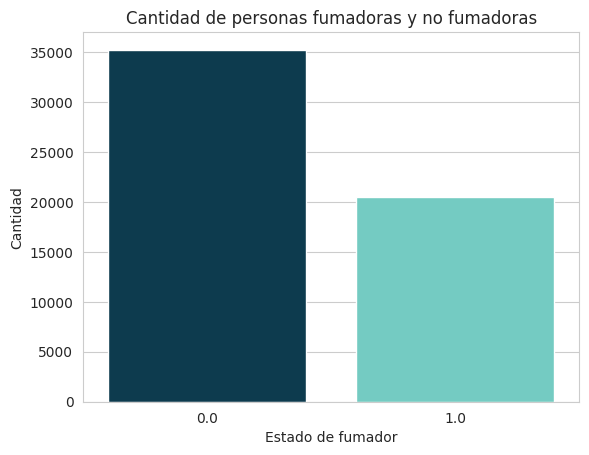

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
smoking_counts = df['smoking'].value_counts()
sns.barplot(x=smoking_counts.index, y=smoking_counts.values)
plt.title('Cantidad de personas fumadoras y no fumadoras')
plt.xlabel('Estado de fumador')
plt.ylabel('Cantidad')

plt.show()


Aqui se obserba un boxplot que muestra la mediana de edad de ambos grupos marcando una diferencia de no fumadores en 45 años aproximadamente y fumadores en 40 aproximadamente.

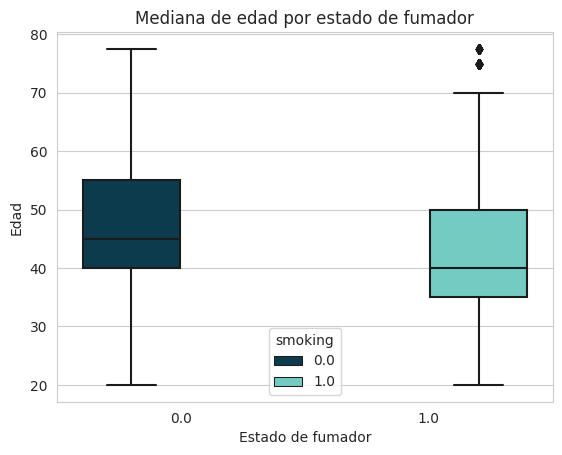

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')


sns.boxplot(data=df, x='smoking', y='age', hue='smoking')

plt.title('Mediana de edad por estado de fumador')
plt.xlabel('Estado de fumador')
plt.ylabel('Edad')

plt.show()



Tabien en este conjunto de datos se puede observar una prevalencia mayor en la poblacion masculina a ser fumadores.

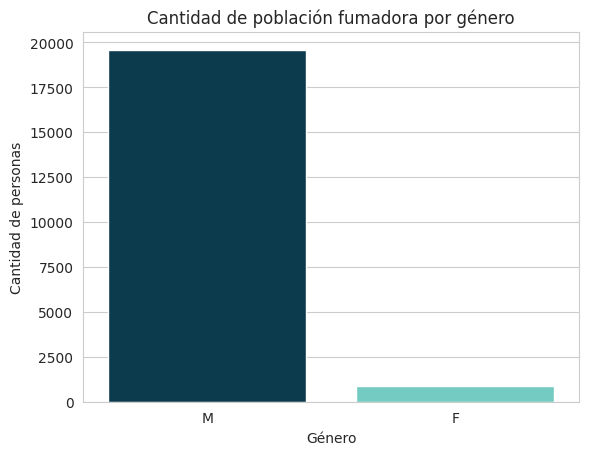

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


df_smoking_1 = df[df['smoking'] == 1.0]


sns.countplot(data=df_smoking_1, x='gender')


plt.title('Cantidad de población fumadora por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')

# Mostrar el gráfico
plt.show()


En este otro boxplot se puede ver como el grupo de fumadores posee un valor superior en su mediana de trigliceridos.

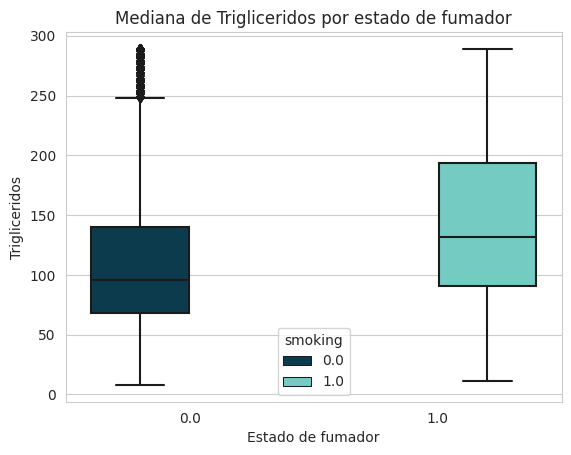

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')


sns.boxplot(data=df, x='smoking', y='triglyceride', hue='smoking')

plt.title('Mediana de Trigliceridos por estado de fumador')
plt.xlabel('Estado de fumador')
plt.ylabel('Trigliceridos')

plt.show()


Para continuar con las variables sistolica y diastolica se decide calcular una relacion utilizada en la medicina llamada Tension Arterial Media (TAM) que mide la proporcion del tiempo de un latido ocupado por cada presion. Sigue la siguiente formula.

In [18]:
df['TAM'] = (df['systolic'] + 0.5 * df['relaxation']) / 2
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,hemoglobin,serum creatinine,AST,ALT,Gtp,tartar,smoking,height(M),IMC,TAM
0,F,40.0,155.0,60.0,81.3,1.2,1.0,114.0,73.0,94.0,...,12.9,0.7,18.0,19.0,27.0,Y,0.0,1.55,24.973985,75.25
1,F,40.0,160.0,60.0,81.0,0.8,0.6,119.0,70.0,126.5,...,12.7,0.6,22.0,19.0,18.0,Y,0.0,1.60,23.437500,77.00
2,M,55.0,170.0,60.0,80.0,0.8,0.8,138.0,86.0,89.0,...,15.8,1.0,21.0,16.0,22.0,N,1.0,1.70,20.761246,90.50
3,M,40.0,165.0,70.0,88.0,1.5,1.5,100.0,60.0,96.0,...,14.7,1.0,19.0,26.0,18.0,Y,0.0,1.65,25.711662,65.00
4,F,40.0,155.0,60.0,86.0,1.0,1.0,120.0,74.0,80.0,...,12.5,0.6,16.0,14.0,22.0,N,0.0,1.55,24.973985,78.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40.0,170.0,65.0,75.0,0.9,0.9,110.0,68.0,89.0,...,12.3,0.6,14.0,7.0,10.0,Y,0.0,1.70,22.491349,72.00
55688,F,45.0,160.0,50.0,70.0,1.2,1.2,101.0,62.0,89.0,...,14.0,0.9,20.0,12.0,14.0,Y,0.0,1.60,19.531250,66.00
55689,F,55.0,160.0,50.0,68.5,1.0,1.2,117.0,72.0,88.0,...,12.4,0.5,17.0,11.0,12.0,N,0.0,1.60,19.531250,76.50
55690,M,60.0,165.0,60.0,78.0,0.8,1.0,133.0,76.0,107.0,...,14.4,0.7,20.0,19.0,18.0,N,0.0,1.65,22.038567,85.50


En su correspondiente Boxplot podemos ver la variacion en la TAM de ambos grupos.

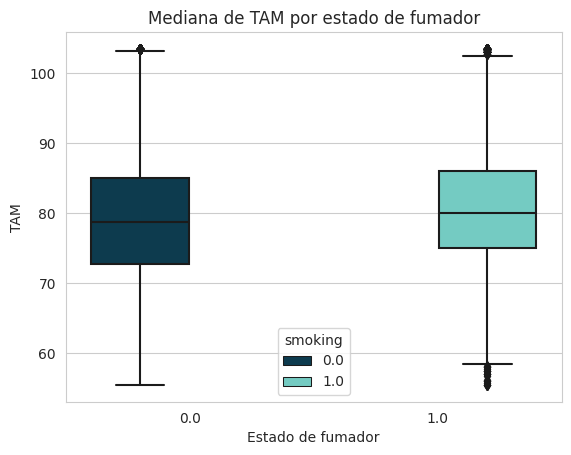

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

sns.boxplot(data=df, x='smoking', y='TAM', hue='smoking')

plt.title('Mediana de TAM por estado de fumador')
plt.xlabel('Estado de fumador')
plt.ylabel('TAM')

plt.show()